In [2]:
from astrodb_utils.spectra import check_spectrum_plottable
from astropy.io import fits
import astropy.units as u
import os
import pandas as pd
import numpy as np
from specutils import Spectrum1D, Spectrum
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from specutils.manipulation import median_smooth

INFO     - astrodb_utils.publications - logger.parent.name: astrodb_utils, logger.parent.level: 20


This notebook is to convert:  
- 13 Xshooter_VIS Spectra
- 1 Xshooter_UVB Spectrum

In [3]:
path="/Users/guanying/SIMPLE db/SIMPLE-db/scripts/spectra_convert/zhang18/sty2054_supplemental_files"
import os
file_list = os.listdir(path)

In [4]:
path="/Users/guanying/SIMPLE db/SIMPLE-db/scripts/spectra_convert/zhang18/sty2054_supplemental_files"
import os
file_list = os.listdir(path)


Reading ULAS_J021642.96+004005.7_sdL4_Xshooter_VIS_Primeval-I.fits


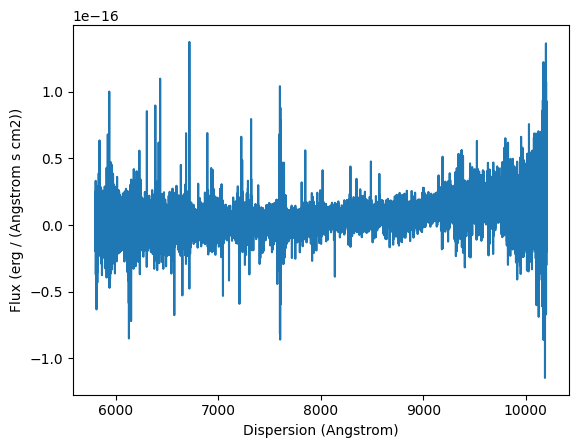

Try Smoothing


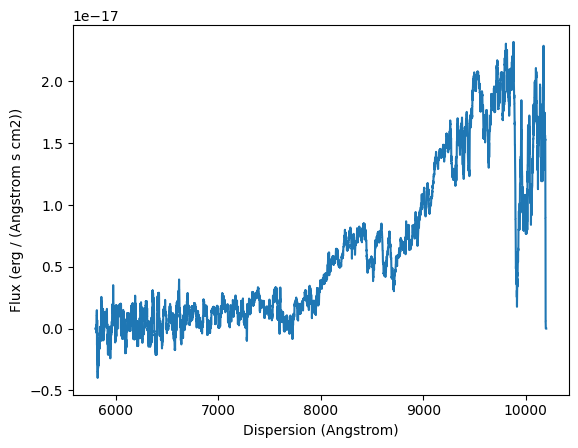

ULAS_J021642.96+004005.7_sdL4_Xshooter_VIS_Primeval-I.fits is plottable.

Reading ULAS_J223302.03+062030.8_esdL0.5_Xshooter_VIS_Primeval-IV.fits


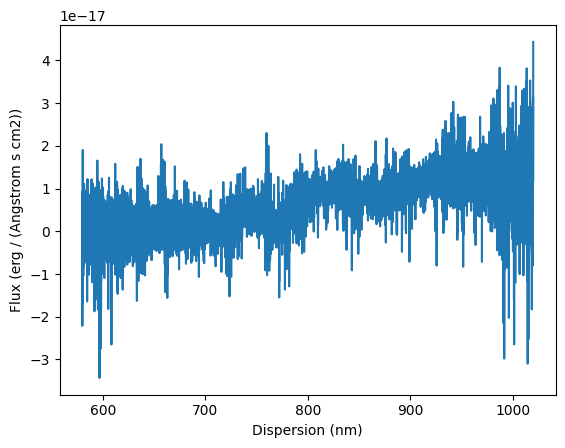

Try Smoothing


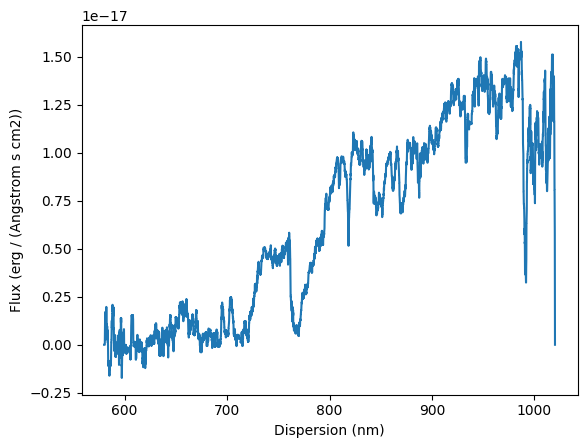

ULAS_J223302.03+062030.8_esdL0.5_Xshooter_VIS_Primeval-IV.fits is plottable.

Reading ULAS_J230711.01+014447.1_usdL4.5_Xshooter_VIS_Primeval-III.fits


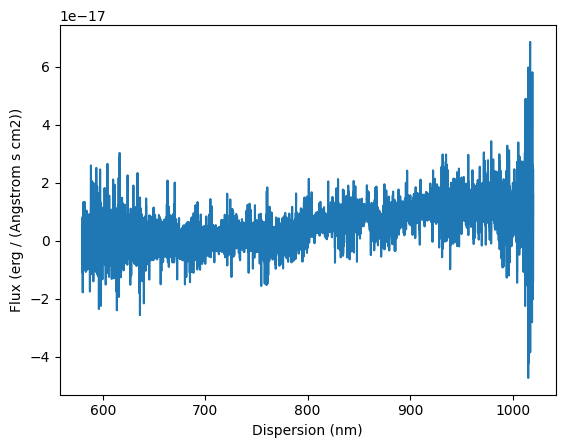

Try Smoothing


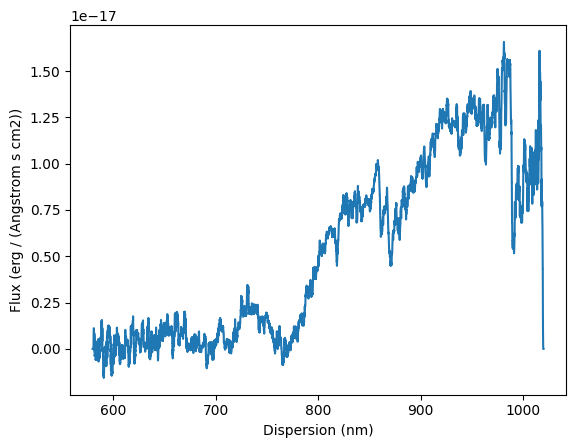

ULAS_J230711.01+014447.1_usdL4.5_Xshooter_VIS_Primeval-III.fits is plottable.

Reading 2MASS_J06164006-6407194_esdL6_Xshooter_VIS_Primeval-I.fits


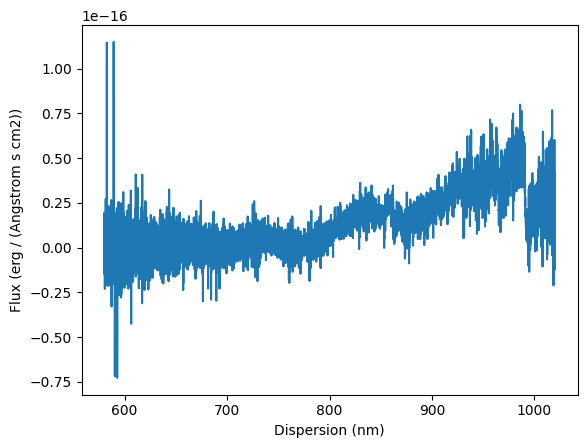

Try Smoothing


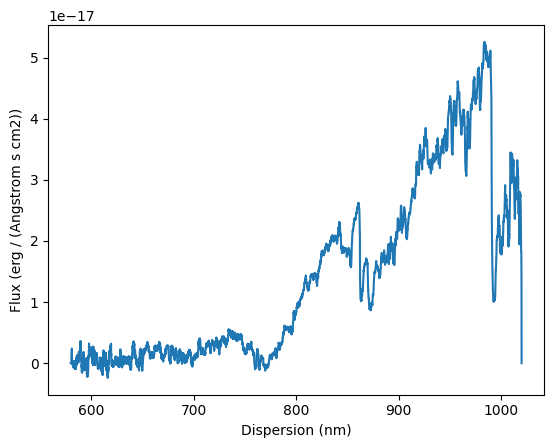

2MASS_J06164006-6407194_esdL6_Xshooter_VIS_Primeval-I.fits is plottable.

Reading SDSS_J010448.46+153501.8_usdL1.5_Xshooter_VIS_Primeval-II.fits


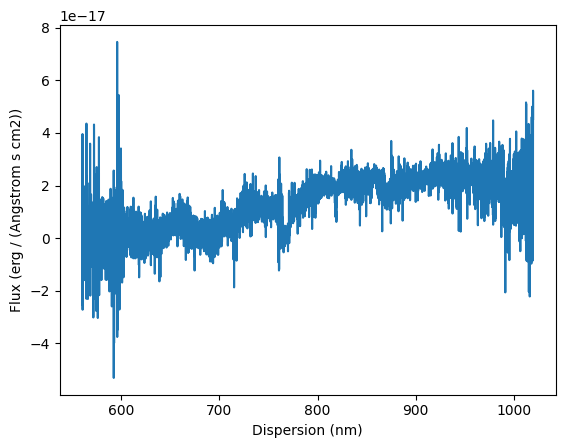

Try Smoothing


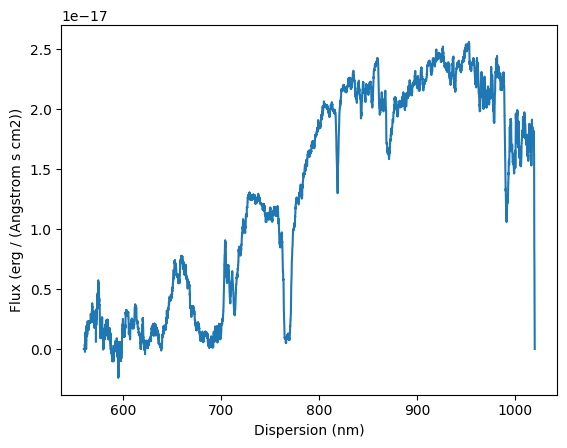

SDSS_J010448.46+153501.8_usdL1.5_Xshooter_VIS_Primeval-II.fits is plottable.

Reading ULAS_J141203.85+121609.9_sdL5_Xshooter_VIS_Primeval-IV.fits


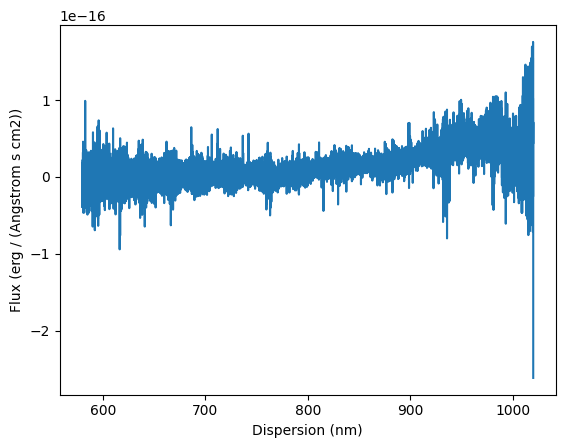

Try Smoothing


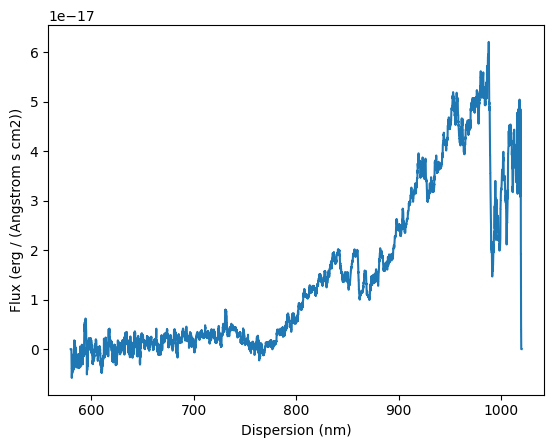

ULAS_J141203.85+121609.9_sdL5_Xshooter_VIS_Primeval-IV.fits is plottable.

Reading ULAS_J151913.03-000030.0_sdL4_Xshooter_VIS_Primeval-I.fits


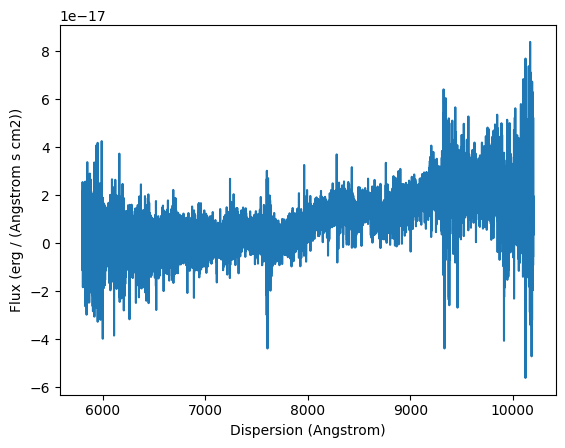

Try Smoothing


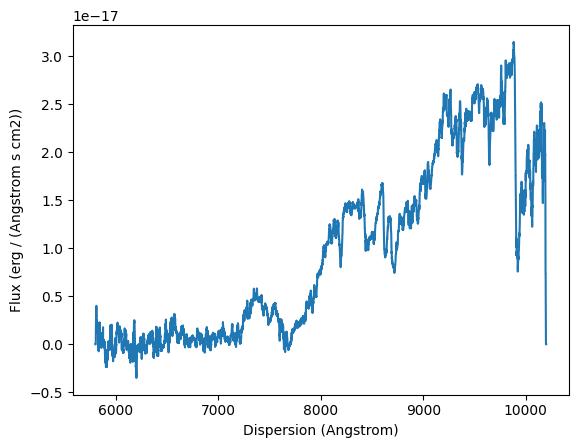

ULAS_J151913.03-000030.0_sdL4_Xshooter_VIS_Primeval-I.fits is plottable.

Reading ULAS_J130710.22+151103.4_sdL8_Xshooter_VIS_Primeval-IV.fits.fits


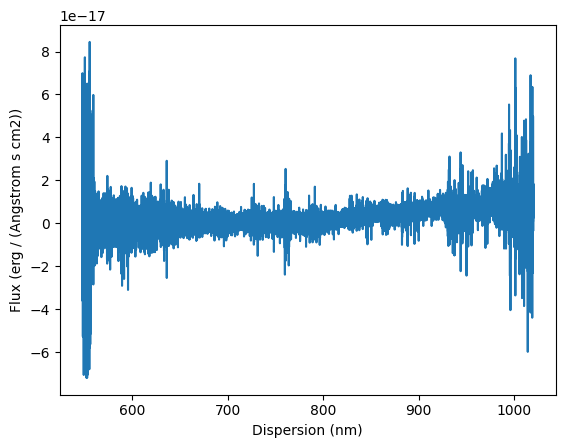

Try Smoothing


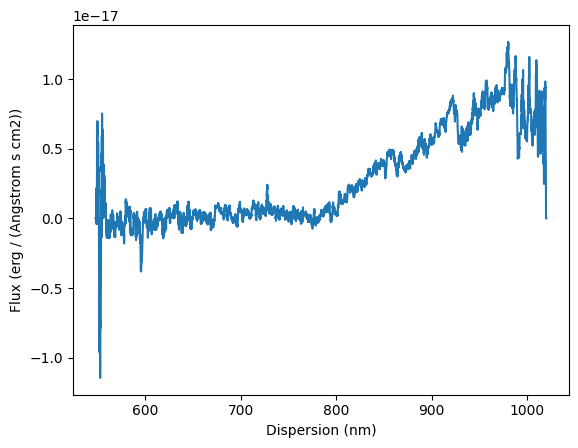

ULAS_J130710.22+151103.4_sdL8_Xshooter_VIS_Primeval-IV.fits.fits is plottable.

Reading ULAS_J024035.36+060629.3_sdM7_Xshooter_VIS_Primevl-IV.fits


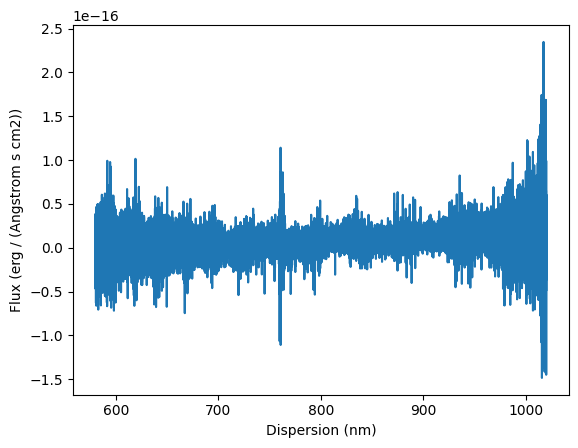

Try Smoothing


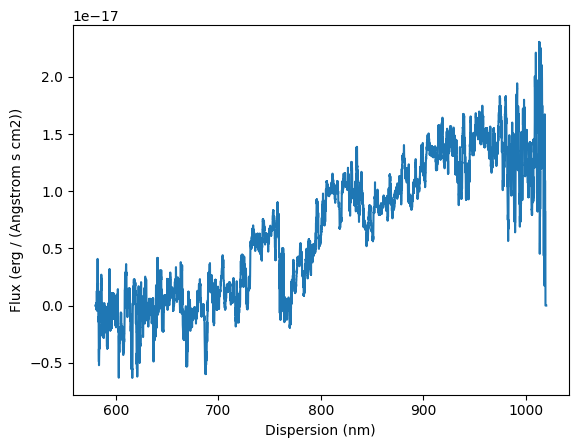

ULAS_J024035.36+060629.3_sdM7_Xshooter_VIS_Primevl-IV.fits is plottable.

Reading ULAS_J135058.85+081506.8_usdL3_Xshooter_VIS_Primeval-III.fits
Failed to read ULAS_J135058.85+081506.8_usdL3_Xshooter_VIS_Primeval-III.fits: spec_axis does not have unit: <class 'list'> []

Reading ULAS_J020858.62+020657.0_esdL3_Xshooter_VIS_Primeval-III.fits
Failed to read ULAS_J020858.62+020657.0_esdL3_Xshooter_VIS_Primeval-III.fits: spec_axis does not have unit: <class 'list'> []

Reading ULAS_J233227.03+123452.0_L6p+T4p_Xshooter_VIS_Primeval-IV.fits


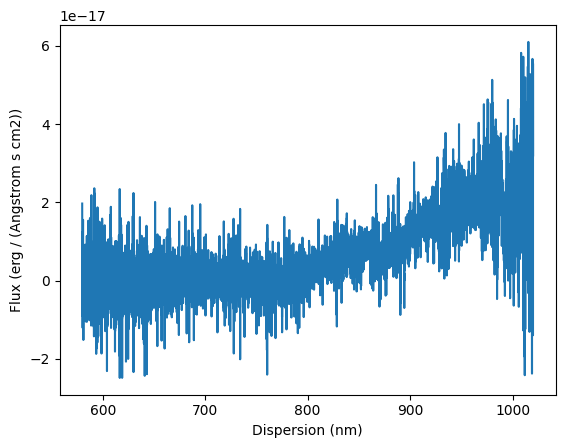

Try Smoothing


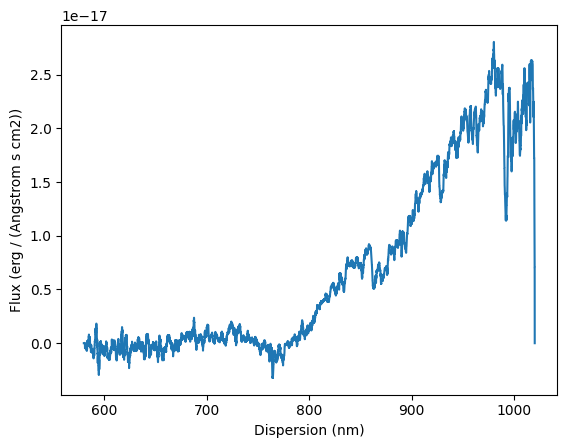

ULAS_J233227.03+123452.0_L6p+T4p_Xshooter_VIS_Primeval-IV.fits is plottable.

Reading 2MASS_J06453153-6646120_sdL8_Xshooter_VIS_Primeval-IV.fits


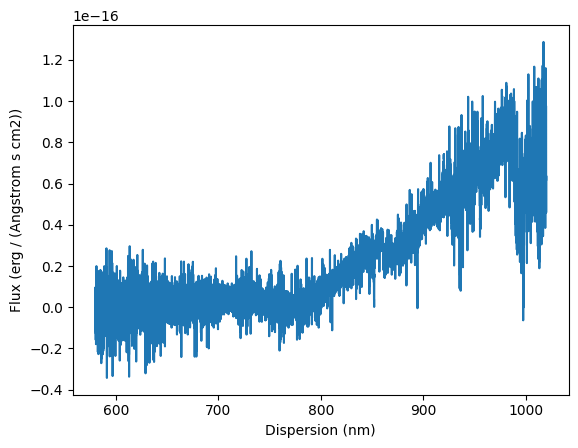

Try Smoothing


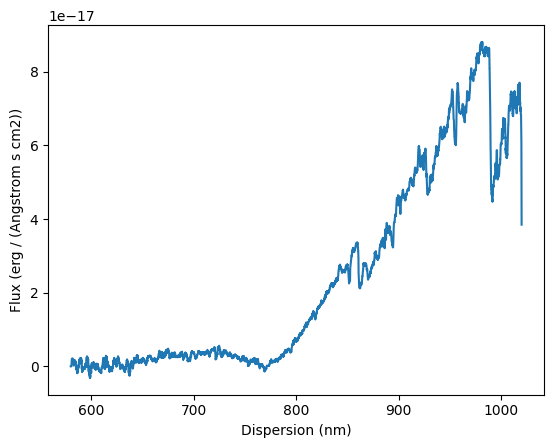

2MASS_J06453153-6646120_sdL8_Xshooter_VIS_Primeval-IV.fits is plottable.
Total plottable files: 11
Total failed files: 2
failed_files: ['ULAS_J135058.85+081506.8_usdL3_Xshooter_VIS_Primeval-III.fits', 'ULAS_J020858.62+020657.0_esdL3_Xshooter_VIS_Primeval-III.fits']


In [5]:
file_plotted = 0
file_failed = 0
failed_files = []

for filename in file_list:
    if filename.endswith(".fits") and "Xshooter_VIS" in filename:
        file_path = os.path.join(path, filename)
        try:
            with fits.open(file_path):
                print(f"\nReading {filename}")

                spec = Spectrum.read(file_path, format='wcs1d-fits', flux_unit="erg / (cm2 s Angstrom)")

                check_spectrum_plottable(spec, show_plot=True)

                # Apply smooth
                print("Try Smoothing")
                smoothed_spec = median_smooth(spec, width=101)
                
                if check_spectrum_plottable(smoothed_spec, show_plot=True):
                    print(f"{filename} is plottable.")
                    file_plotted += 1
                else:
                    print(f"{filename} is NOT plottable.")
                    file_failed += 1
        except Exception as e:
            print(f"Failed to read {filename}: {e}")
            file_failed += 1
            failed_files.append(filename)

print(f"Total plottable files: {file_plotted}")
print(f"Total failed files: {file_failed}")
print(f"failed_files: {failed_files}")


Reading FITS file: ULAS_J020858.62+020657.0_esdL3_Xshooter_VIS_Primeval-III.fits
   NAXIS:  1
   Original data shape: (23001,)


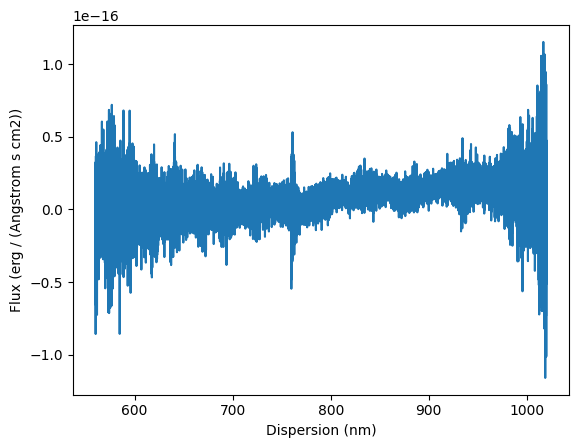

Trying smooth spectrum


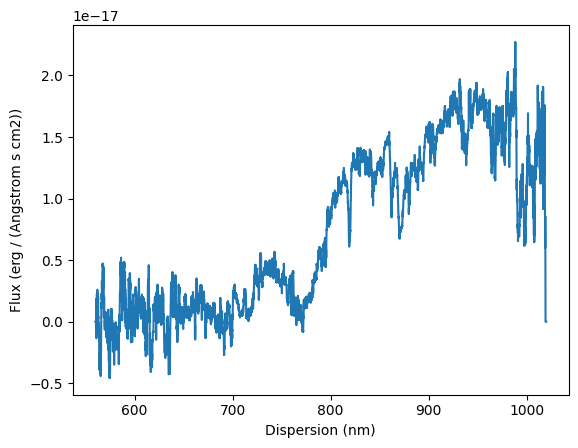


Reading FITS file: ULAS_J135058.85+081506.8_usdL3_Xshooter_VIS_Primeval-III.fits
   NAXIS:  1
   Original data shape: (22001,)


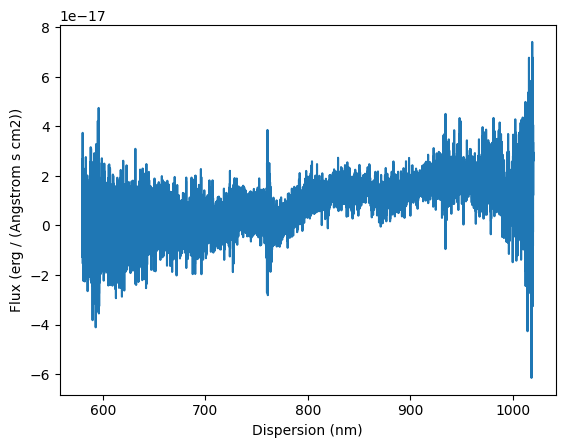

Trying smooth spectrum


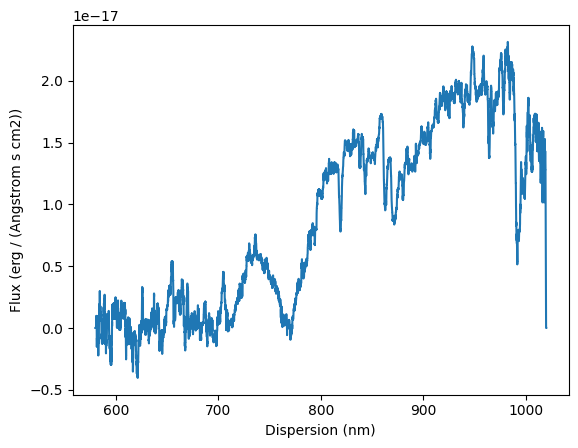

In [6]:
# Another failed file test
failed_file_test = [
    "ULAS_J020858.62+020657.0_esdL3_Xshooter_VIS_Primeval-III.fits", 
    "ULAS_J135058.85+081506.8_usdL3_Xshooter_VIS_Primeval-III.fits"
]

for filename in failed_file_test:
    file_path = os.path.join(path, filename)
    try:
        with fits.open(file_path) as hdul:
            data = hdul[0].data
            header = hdul[0].header.copy()
            print(f"\nReading FITS file: {filename}")
            print("   NAXIS: ", header["NAXIS"])
            print("   Original data shape:", data.shape)

        # 1D flux
        wcs_1d = WCS(header, naxis=1)
        last_idx = data.shape[-1] 
        wavelength = wcs_1d.pixel_to_world(np.arange(last_idx))

        if data.ndim == 3:
            hdul[0].data = data[0, 0, :]  #get (N,)
        else:
            hdul[0].data = data

        spec = Spectrum(flux=hdul[0].data * u.Unit("erg / (cm2 s Angstrom)"),
                        wcs=wcs_1d)
        # Check specutils func
        check_spectrum_plottable(spec, raise_error=True, show_plot=True)
        print("Trying smooth spectrum")
        smoothed_spec = median_smooth(spec, width=101)
        check_spectrum_plottable(smoothed_spec, raise_error=True, show_plot=True)

    except Exception as e:
        print(f"Error reading {filename}: {e}")


wavelength range: 298.92 - 555.999999999766
flux range: -1.158413100686706e-13 - 1.221474906897696e-13


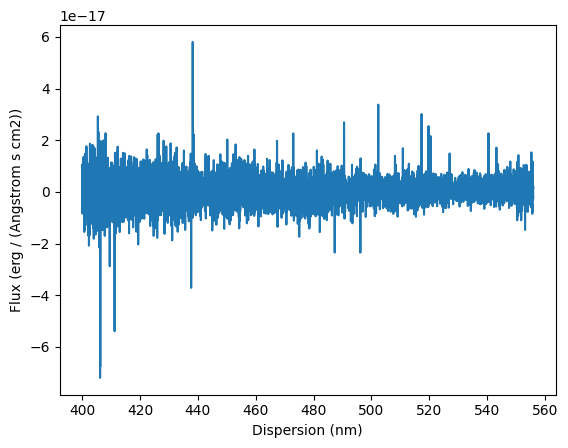

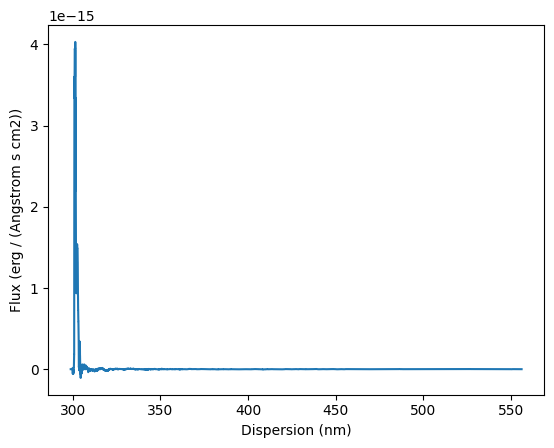

In [19]:
# # Xshooter UVB -- ignoring UVB
from specutils.manipulation import extract_region
from specutils import Spectrum, SpectralRegion

Xshooter_UVB = "SDSS_J010448.46+153501.8_usdL1.5_Xshooter_UVB_Primeval-II.fits"
file_path = os.path.join(path, Xshooter_UVB)

with fits.open(file_path) as hdul:
    data = hdul[0].data
    header = hdul[0].header

    print(f"wavelength range: {header['CRVAL1']} - {header['CRVAL1'] + header['CDELT1'] * header['NAXIS1']}")
    print(f"flux range: {np.min(data)} - {np.max(data)}")

    spectrum = Spectrum.read(file_path)
    region = SpectralRegion(400*u.nm,600*u.nm)
    spec = extract_region(spectrum, region)

    check_spectrum_plottable(spec, raise_error=True, show_plot=True)
    smoothed_spectrum = median_smooth(spectrum, width=101)
    check_spectrum_plottable(smoothed_spectrum, raise_error=True, show_plot=True)